# **STAT 301 Group 2 Final Report**
# **Understanding and Predicting Heart Disease Presence Using Clinical Data**

Asteria Xu - 56376452

Peter Jin -  45472420

Philip Loewen - 70359054

Swapnil Dubey - 70081476

## **Introduction**

Heart disease remains a leading cause of mortality worldwide, posing a significant public health challenge. Early detection and accurate prediction are crucial for effective intervention and management. Various predictors have been highlighted in recent studies, such as sex, chest pain type, and exercise-induced angina, which have shown significant predictive value using logistic regression models (Ganesh et al., 2022). Additionally, maximum heart rate and resting blood pressure also have strong association with heart disease presence (Krittanawong et al., 2019). Leveraging machine learning techniques on clinical data can furhter enhance prediction accuracy, informing clinical decision-making and risk assessment strategies (Alqahtani et al., 2022).

The Heart Disease dataset from the UCI Machine Learning Repository is a reliable resource for heart disease prediction. This dataset includes data collected from four different locations: Cleveland, Hungary, Switzerland, and the VA Long Beach, with the Cleveland database being the most commonly used portion. It comprises 303 observations and 14 variables, with 13 explanatory variables capturing various medical and demographic attributes of patients and one response variable indicating the presence of heart disease.

The dataset includes the following 13 explanatory variables:
1. `age`: Age of the patient in year
2. `sex`: Gender of the patient (0 = female, 1 = male)
3. `cp`: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. `trestbps`: Resting blood pressure (on admission to the hospital) in mmHg
5. `chol`: Serum cholesterol in mg/dl
6. `fbs`: Fasting blood sugar > 120 mg/dl (0 = no, 1 = yes)
7. `restecg`: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
8. `thalach`: Maximum heart rate achieved
9. `exang`: Exercise-induced angina (0 = no, 1 = yes)
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. `ca`: Number of major vessels (0-3) colored by fluoroscopy
13. `thal`: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)

The response variable is `num` (0 = no heart disease, and 1-4 indicate the presence and severity of heart disease).

The research questions can be: **Which predictors are most critical for accurately predicting the presence of heart disease, and how does model selection impact predictive performance?** The questions address both inference and prediction aspects, aiming to understand the factors most associated with heart disease and decelop an accurate predictive model for early detection and management.


## **Methods and Results**
### Exploratory Data Analysis (EDA)


In [ ]:
install.packages("GGally")
install.packages("leaps")
install.packages("rsample")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [ ]:
library(GGally)
library(ggplot2)
library(dplyr)
library(leaps)
library(rsample)
library(glmnet)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8



The first step in this research project is to import the processed Cleveland data into Jupyterlab. Since the dataset is missing headers for all 14 variables, we need to assign the headers by the function, `colnames`. We also set all categorical variables as factors.
We name the data set `clean_cleveland_heart_data`.

In [ ]:
# Main developer: Swapnil Dubey
# Contributer: Philip Loewen (added factors)

cleveland_heart_data<-read.table("data/processed.cleveland.data", sep = ",", header = TRUE, na.strings = c("NA", "?"))
colnames(cleveland_heart_data)<-c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope",
                                  "ca", "thal", "num")

factor_vars <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal")
cleveland_heart_data[,factor_vars] <- lapply(cleveland_heart_data[,factor_vars], factor)
head(cleveland_heart_data)
nrow(cleveland_heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3


[1] 302

Table 1: Unmodified Cleveland Heart Dataset

We imported all the R libraries and packages we need for this project.

The response variable in this dataset, `num`, has been divided into 0-4, which we do not want. We seek to infer the presence of heart disease instead of its types, technically only 0 and 1 are needed. Therefore, we further processed `clean_cleveland_heart_data` to modify the `num` column where 0 stays the same and all other numbers become 1. Furthermore, we excluded all the rows with `na` values.

In [ ]:
# Main developer: Swapnil Dubey

clean_cleveland_heart_data <- cleveland_heart_data %>%
  mutate(num = ifelse(num == 0, 0, 1)) %>%
  na.omit()
clean_cleveland_heart_data$num<-as.factor(clean_cleveland_heart_data$num)
head(clean_cleveland_heart_data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1


Table 2: Cleaned Cleveland Heart Dataset

Warning message in geom_bar(aes(x = num), bins = 2):
“Ignoring unknown parameters: `bins`”


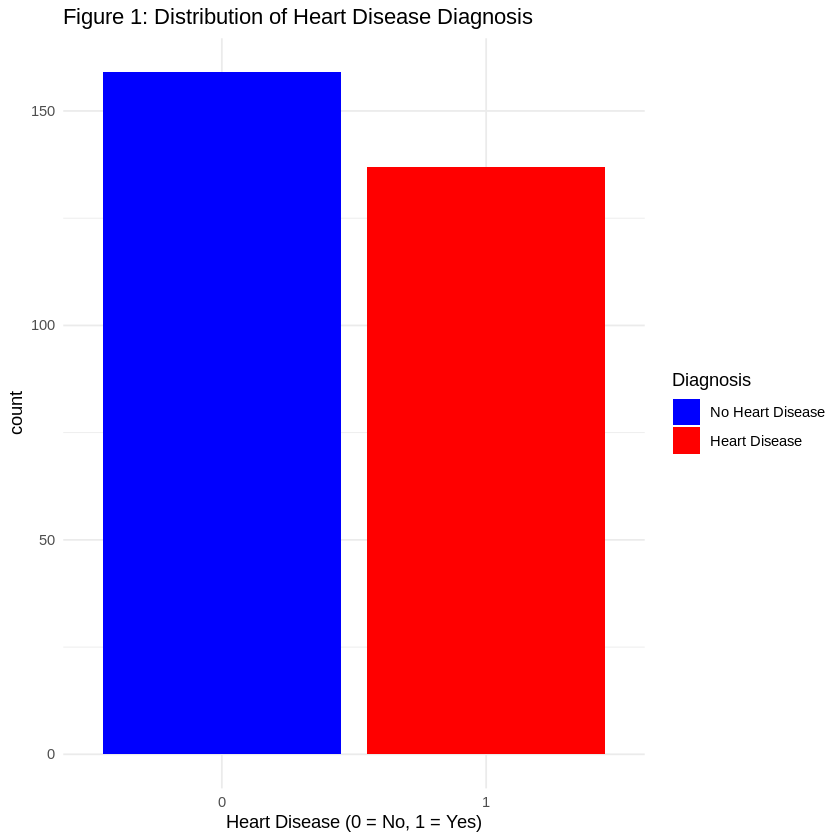

In [ ]:
# Main developer: Swapnil Dubey
# PLOT RAW DATA : tailoring your plot to address your question, explore explanatory vars with response.
# Any summary tables that are relevant to your analysis. Your EDA must be comprehensive with high quality plots.
ggplot(clean_cleveland_heart_data, aes(fill = num)) +
  geom_bar(aes(x = num), bins = 2) +
  ggtitle("Figure 1: Distribution of Heart Disease Diagnosis") +
  xlab("Heart Disease (0 = No, 1 = Yes)") +
  scale_fill_manual(values = c("blue", "red"), name = "Diagnosis", labels = c("No Heart Disease", "Heart Disease")) +
  theme_minimal()


This bar chart above provides a visualization for the count summary of the response variable num(Heart Disease presence). We can see that in our dataset, about ~160 records are of patients that do not have heart disease and about ~135 records are of patients that have heart disease. So the data for the response variable seems fairly balanced in the dataset.

In [ ]:
# Main Dev: Swapnil Dubey

# summary table for quantitative variable and frequency tables for categorical variables
summary(clean_cleveland_heart_data)

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   1: 22   Min.   : 94.0   Min.   :126.0   0:254  
 1st Qu.:48.00   1:200   2: 49   1st Qu.:120.0   1st Qu.:211.0   1: 42  
 Median :56.00           3: 83   Median :130.0   Median :243.0          
 Mean   :54.51           4:142   Mean   :131.6   Mean   :247.4          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:276.2          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak      slope         ca        
 0:147   Min.   : 71.0   0:199   Min.   :0.000   1:139   Min.   :0.0000  
 1:  4   1st Qu.:133.0   1: 97   1st Qu.:0.000   2:137   1st Qu.:0.0000  
 2:145   Median :153.0           Median :0.800   3: 20   Median :0.0000  
         Mean   :149.6           Mean   :1.051           Mean   :0.6791  
         3rd Qu.:166.0           3rd Qu.:1.600           3rd Qu.:1.0000  
         Max.   :202.0           Max.   :6.20

Summary Table 1: Summary of dataset \
The dataset summary reveals that the majority of the individuals are middle-aged males, with a mean age of 54.54 years. Chest pain type 4 (asymptomatic) and non-anginal pain are the most common, and most individuals have normal fasting blood sugar and normal or left ventricular hypertrophy in their resting ECG results. Blood pressure, cholesterol, and heart rate metrics show a wide range, with median values indicating slightly elevated levels common in cardiovascular studies.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


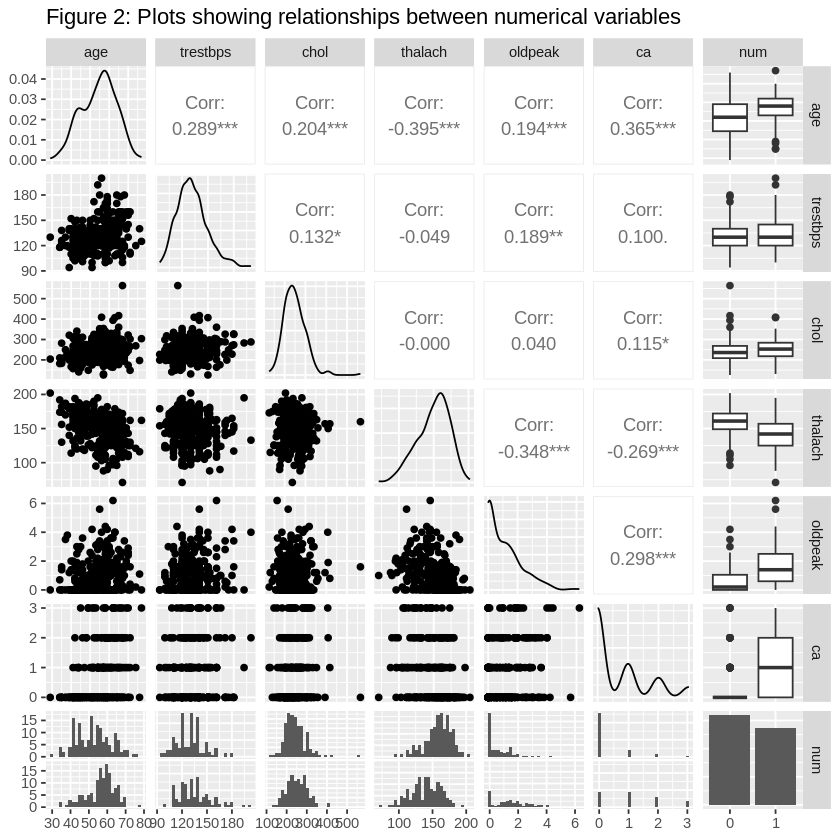

In [ ]:
#Main Dev: Swapnil Dubey

#ggpairs for numerical explanatory variables
numericvars<-select(clean_cleveland_heart_data, -sex,-cp,-fbs,-restecg,-exang,-slope,-thal)
ggpairs(numericvars, title = 'Figure 2: Plots showing relationships between numerical variables')

We can see that none of the quantitative predictor are highly (negative or positive) correlated with another quantitative predictor, so there is low chance of multicollinearity in our model. Furthermore, the highest absolute correlation  we see is -0.395 between age and maximum heart rate achieved.
Also, along the diagonal we see the distribution of the quantitative predictors. Age appears to be left skewed, trestbps is right skewed, chol is right skewed, thalch is left skewed, oldpeak is right skewed and we see an interesting wave-like pattern in ca that is also right skewed.

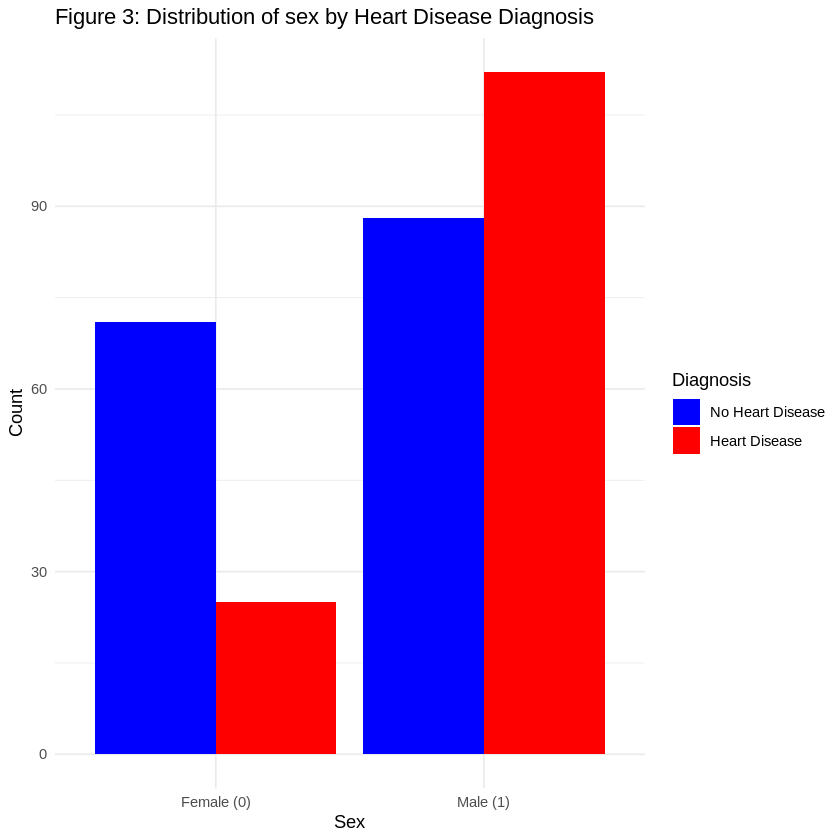

In [ ]:
#Main dev: Swapnil Dubey
categvars<-select(clean_cleveland_heart_data, sex,cp,fbs,restecg,exang,slope, num)|>
          mutate(sex = factor(sex, levels = c(0, 1), labels = c("Female (0)", "Male (1)")),
          cp = factor(cp, levels = c(1,2,3,4), labels = c("Typical Angina (1)",
             "Atypical Angina (2)", "Non-anginal pain (3)", "Asymptomatic (4)")),
          fbs = factor(fbs, levels = c(0, 1), labels = c("No (0)", "Yes (1)")),
          restecg = factor(restecg, levels = c(0, 1,2), labels = c("Normal (0)",
           "having ST-T wave abnormality (1)", "showing probable or definite
           left verticular hypertrophy (2)")),
          exang = factor(exang, levels = c(0, 1), labels = c("No (0)", "Yes (1)")),
          slope = factor(slope, levels = c(1, 2, 3), labels = c("Upsloping (1)",
           "Flat (2)", "Downsloping(3)"))
          )
ggplot(categvars, aes(x = sex, fill = num)) +
    geom_bar(position = "dodge") +
    ggtitle("Figure 3: Distribution of sex by Heart Disease Diagnosis") +
    xlab("Sex") +
    ylab("Count") +
    scale_fill_manual(values = c("blue", "red"), name = "Diagnosis", labels = c("No Heart Disease", "Heart Disease")) +
    theme_minimal()

This bar plot shows the distribution of sex among individuals diagnosed with heart disease versus those without heart disease. It highlights a contrast in the prevalence of heart disease between males and females. Specifically, a larger proportion of males are diagnosed with heart disease compared to females, while more females are in the "No Heart Disease" category. This suggests a higher incidence of heart disease among males in the dataset.

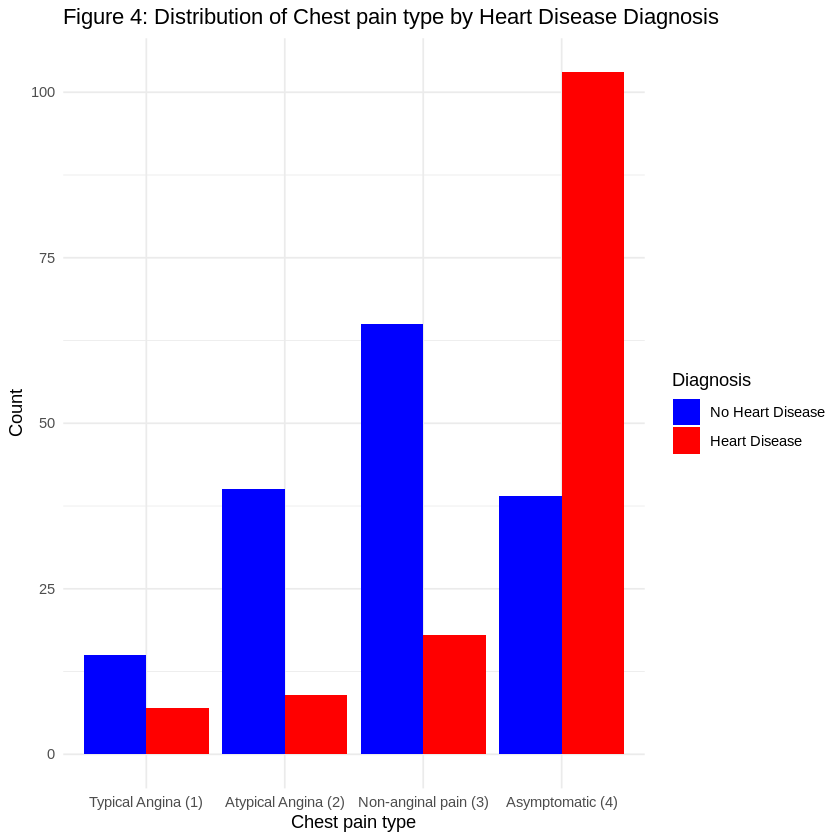

In [ ]:
#Main dev: Swapnil Dubey
ggplot(categvars, aes(x = cp, fill = num)) +
    geom_bar(position = "dodge") +
    ggtitle("Figure 4: Distribution of Chest pain type by Heart Disease Diagnosis") +
    xlab("Chest pain type") +
    ylab("Count") +
    scale_fill_manual(values = c("blue", "red"), name = "Diagnosis", labels = c("No Heart Disease", "Heart Disease")) +
    theme_minimal()

This bar plot illustrates the distribution of different chest pain types (ranging from typical angina to asymptomatic) among individuals with and without heart disease. The plot shows that those with asymptomatic chest pain have the highest incidence of heart disease, whereas individuals experiencing non-anginal pain or atypical angina are more likely to be in the "No Heart Disease" category. This suggests that asymptomatic cases are strongly associated with heart disease in this dataset.

## Methods: Plan

As a necessary step in forward selection, we randomly split our data into training and testing data. The training data set occupies 60% of the original, automatically making the testing data 40% of the original dataset. We also set a seed to prevent different results in the final conclusion.
Now we have `training_cleveland` and `testing_cleveland` ready to be used.

In [ ]:
# Main developer: Swapnil Dubey

set.seed(1111)
# split data set into testing and training
cleveland_split<- clean_cleveland_heart_data|> initial_split(prop = 0.6, strata = num)
training_cleveland<-training(cleveland_split)
testing_cleveland<-testing(cleveland_split)

Now we perform the forward selection method and summarize it by applying `regsubsets` to the training data, including a linear model with all explanatory variables to explain the response. We also need to specify the maximum number of explanatory variables along with the direction of selection. The final product is stored in `cleveland_forward_sel`.

Foward selection is a variable selection method that begins with a model that has 0 variables then finds the best model with 1 variable which has the best fit. With this new model it finds which variable creates the model, along with the original variable, which has the best fit. This process is then repeated all variables are used. We are then given all 18 of these models along with various selection criteria so that we may choose which model size we would like to work with.

In [ ]:
# Main developer: Swapnil Dubey

# perform model selection through forwards search with the largest possible model having 17 variables
cleveland_forward_sel <- regsubsets(x = num ~ ., nvmax = 18,
                                  data = training_cleveland,
                                  method = "forward")

# display details of the forward search
cleveland_forward_summary <- summary(cleveland_forward_sel)
cleveland_forward_summary

Subset selection object
Call: regsubsets.formula(x = num ~ ., nvmax = 18, data = training_cleveland, 
    method = "forward")
18 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sex1         FALSE      FALSE
cp2          FALSE      FALSE
cp3          FALSE      FALSE
cp4          FALSE      FALSE
trestbps     FALSE      FALSE
chol         FALSE      FALSE
fbs1         FALSE      FALSE
restecg1     FALSE      FALSE
restecg2     FALSE      FALSE
thalach      FALSE      FALSE
exang1       FALSE      FALSE
oldpeak      FALSE      FALSE
slope2       FALSE      FALSE
slope3       FALSE      FALSE
ca           FALSE      FALSE
thal6        FALSE      FALSE
thal7        FALSE      FALSE
1 subsets of each size up to 18
Selection Algorithm: forward
          age sex1 cp2 cp3 cp4 trestbps chol fbs1 restecg1 restecg2 thalach
1  ( 1 )  " " " "  " " " " " " " "      " "  " "  " "      " "      " "    
2  ( 1 )  " " " "  " " " " "*" " "      " "  " "  " "      " 

Although we have produced a summary in the last cell, we still need the values of the model selection criteria. Specifically, we need to examine the level of fit of each model by examining their R Squared, Residual Sum of Squares, Adjusted R Squared, Mallow's CP, and BIC. We obtain a tibble by extracting these data from the summarization of `cleveland_forward_sel`.

In [ ]:
# Main developer: Swapnil Dubey

# display relevant criteria for model selection
cleveland_forward_summary_df <- tibble(
    n_input_variables = 1:18,
    RSQ = cleveland_forward_summary$rsq,
    RSS = cleveland_forward_summary$rss,
    ADJ_R2 = cleveland_forward_summary$adjr2,
    Cp = cleveland_forward_summary$cp,
    BIC = cleveland_forward_summary$bic,
)
cleveland_forward_summary_df

n_input_variables,RSQ,RSS,ADJ_R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3105586,30.34321,0.3066190,103.519411,-55.46933
2,0.4427483,24.52537,0.4363431,52.501102,-87.97023
3,0.4932278,22.30370,0.4844398,34.254937,-99.60117
4,0.5297038,20.69835,0.5187666,21.625234,-107.64672
5,0.5530176,19.67227,0.5399480,14.274565,-111.46990
6,0.5672730,19.04488,0.5520003,10.557042,-112.03071
7,0.5792185,18.51914,0.5617896,7.766005,-111.80934
8,0.5937102,17.88134,0.5743631,3.953682,-112.83654
9,0.5979360,17.69536,0.5762679,4.258809,-109.51100


Table 3: Summary statistics for all 18 models found by the forward search.

With forward selection we are focusing on finding the best-fitted model among all 18 possible additive models. With 5 different evaluation standards, they produce different outcomes in terms of the best model. Based on RSQ and RSS, the model with all variables captures the most variance. Adjusted RSQ peaks at 10 variables and Cp and BIC are minized at 8 variables. As we wish to create a good fitting model with a subset of the available variables, Cp is the most approrpaite statistic for our problem and as such we choose the model with 8 variables.


To visualize how Cp changes with model length, we can plot the number of input variables with the Cp of the corresponding model found through model selection.

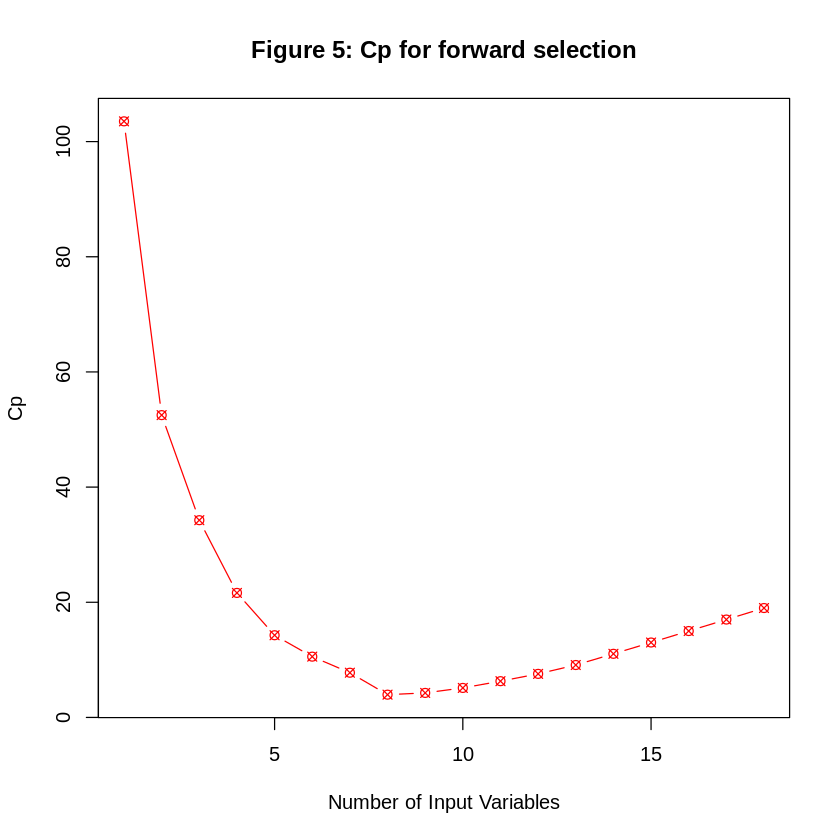

In [ ]:
# Main developer: Swapnil Dubey

# plot the cp level of each model on a graph
plot(summary(cleveland_forward_sel)$cp,
     main = "Figure 5: Cp for forward selection",
     xlab = "Number of Input Variables",
     ylab = "Cp",
     type = "b",
     pch = 13,
     col = "red"
)



As we can see the Cp curve has its lowest point at 8 input variables, although the difference in Cp between the model with 8 variables and the models with 9 or 10 variables is not very large. We can then take a look at this model and its coefficients.

In [ ]:
# Main developer: Swapnil Dubey

# use which.min to find the number of variables in the model with the lowest cp
cp_min = which.min(cleveland_forward_summary$cp)
cp_min
# find the variables in this model
selected_var <- names(coef(cleveland_forward_sel, cp_min))[-1]
selected_var

[1] 8

[1] "sex1"     "cp4"      "trestbps" "thalach"  "exang1"   "slope2"   "ca"      
[8] "thal7"

In [ ]:
# Main developer: Philip Loewen

# build a model with only these variables
OLS_model <- glm(num ~ sex + cp + trestbps + exang + thalach + slope + ca + thal,
                 data = training_cleveland,
                 family = 'binomial')

broom::tidy(OLS_model, exponentiate = TRUE) %>%
  select(term, estimate)

term,estimate
<chr>,<dbl>
(Intercept),0.003023368
sex1,3.685900473
cp2,2.320854520
cp3,0.626757345
cp4,5.399181006
trestbps,1.034791946
exang1,2.565042953
thalach,0.979282996
slope2,4.457002151


Table 4: Coefficients for the additive OLS model num ~ sex + cp + trestbps + exang + thalach + slope + ca + thal.

The OLS model selected 8 variables: `sex`, `cp`, `trestbps`, `thalach`, `exang`, `slope`, `ca` and `thal` while only including certain factor levels of the categorical variables.

The `intercept` (0.0007653) represents the expected value of the response variable when all predictors are set to zero. Specifically, for an individual for which all predictors included in the model are 0, their expected probability of having a heart disease is 0.0007. Categorical variables such as `sex1` suggest that being male is associated with an expected increase in the probability of having a heart disease by 3.686 times, holding all other variables constant.

It is very similar for numerical variables. For instance,  the estimate of `trestbps` is displayed as 1.040. This means an increase of 1mm Hg in resting blood pressure is associated with an expected increase in the probability of having a heart disease by 1.035 times.

Further than forward selection, we also applied **LASSO** regression to provide more insights into seeking a good prediction model. **LASSO** regression functions by finding the coefficients of a logistic model which best fit the data while satisfying the constraint $\sum_{i=1}^p\left|{\beta_i}\right|\le t$ for some value $t$.


The very first step will be to put the training and testing data sets into design matrices and a vector of response variables.

In [ ]:
# Main developer: Philip Loewen

# build matrices for response and target variable data for our lasso model

# training set
model_X_train <- model.matrix(object = num ~ ., data = training_cleveland)[,-1]
matrix_Y_train <- as.matrix(training_cleveland$num, ncol = 1)

# testing srt
model_X_test <- model.matrix(object = num ~ ., data = testing_cleveland)[,-1]
matrix_Y_test <- as.matrix(testing_cleveland$num, ncol = 1)

This code cell performs cross-validation to determine the optimal lambda for a Lasso logistic regression model on the training data. We use `cv.glmnet` function which x and y are set to the training explanatory and response matrices correspondingly. The alpha level is set to 1 since we are using a Lasso regression. We filled the family variable to `binomial` since we are inferencing a binary response variable. Due to the same reason, we choose `auc` in `type.measure.` We decided to apply 10-fold cross-validation.

In [ ]:
# Main developer: Philip Loewen

set.seed(1111)
# use cross validation to fit lasso models on our training data

heart_cv_lambda_lasso <-
  cv.glmnet(
       x = model_X_train,
       y = matrix_Y_train,
       alpha = 1,
       family = 'binomial',
       type.measure = 'auc',
       nfolds = 10)
heart_cv_lambda_lasso


Call:  cv.glmnet(x = model_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 10, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.02474    27  0.9215 0.01853      10
1se 0.08291    14  0.9041 0.02242       7

After we achieved the best lambda value, we used it to build the final model. We apply `glmnet` with the only difference that we have to fill in the `lambda` variable. We have already obtained the value which is the minimum lambda from the last cell. The final model is stored in `heart_lasso_max_AUC`.

In [ ]:
# Main developer: Philip Loewen

set.seed(1111)
# build the lasso with the lambda value which maximized the AUC

heart_lasso_max_AUC <-
  glmnet(
  x = model_X_train, y = matrix_Y_train,
  alpha = 1,
  family = 'binomial',
  lambda = heart_cv_lambda_lasso$lambda.min
)

# display the coefficients of the model and exponentiate them
as.data.frame(as.matrix(coef(heart_lasso_max_AUC))) %>%
  filter(s0 != 0) %>%
  exp()

,s0
,<dbl>
(Intercept),0.1092995
sex1,1.6152947
cp3,0.7171320
cp4,2.6907303
trestbps,1.0136876
thalach,0.9854253
exang1,2.0047207
oldpeak,1.3109520
slope2,1.6758847


Table 5: Coefficients for the LASSO model with the highest AUC.

The lasso regression selected 9 different variables to include in the model: `sex`, `cp`, `trestbps`, `thalach`, `exang`, `oldpeak`, `slope`, `ca` and `thal` while only including certain factor levels of the categorical variables. The interpretation for the estimate is very similar to the OLS model.

Since lasso has biased coefficient estimates, it is not well suited for inferential purposes. However, these biased estimates allow the lasso model to not overfit on the training data and perform well on testing data. As such we expect lasso to perform better than ols will on our training set.

In the cell below, we defined a new function called `prediction_stats` for calculating performance metrics for our binary classification model, and it finally produces a generalized model performance. It takes three arguments: `model`, `truth`, and `data`.

The function creates predictions on `data` based on a 0.5 threshold and compares them to the `truth` data. Finally the prediction calaculates the accuracy, precision, sensitivity and specificity of the model.


In [ ]:
# Main developer: Philip Loewen

# definition of a custom function to calculate prediction statistics for a given model

prediction_stats <- function(model, truth, data) {
     pred = round(predict(model, data, type = 'response'), 0)                     # create predictions
     conf_matrix = data.frame(table(predicted = pred, actual = truth))            # set up confusion matrix
     acc = (conf_matrix$Freq[1]+conf_matrix$Freq[4])/sum(conf_matrix$Freq)        # calculate accuracy
     prec = conf_matrix$Freq[1]/(conf_matrix$Freq[1] + conf_matrix$Freq[2])       # calculate precision
     sens = conf_matrix$Freq[1]/(conf_matrix$Freq[1] + conf_matrix$Freq[3])       # calculate sensitivity
     spec = conf_matrix$Freq[4]/(conf_matrix$Freq[2] + conf_matrix$Freq[4])       # calculate specificity
     data.frame(accuracy = acc, precision = prec, sensitivity = sens, specificity = spec)
    }

Using the previous function, we can assess our models for predictive purposes. It is necessary to look at statistics other than accuracy and sensitivity to avoid creating a model that are too simple.

We can now compute the prediction metrics of the three models we have created, while comparing them to the full additive OLS model as a benchmark.

In [ ]:
# Main developer: Philip Loewen

# Computation of prediction statistics for both models
ols_prediction_stats <- prediction_stats(OLS_model, testing_cleveland$num, testing_cleveland)
lasso_prediction_stats <- prediction_stats(heart_lasso_max_AUC, matrix_Y_test, model_X_test)

# Bind all statistics together for easy comparison
model_metrics <- rbind(ols_prediction_stats, lasso_prediction_stats) %>%
                 round(3) %>%
                 mutate(model = c("ols", "lasso"), .before = everything())
model_metrics

model,accuracy,precision,sensitivity,specificity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ols,0.798,0.828,0.803,0.792
lasso,0.798,0.844,0.794,0.804


Table 6: Prediction statistics for both the OLS and LASSO models.

As we can see all both methods have lead to very similar results with a higher precision in the lasso model, however the lasso model takes into account 9 different variables, while the OLS model only takes into 8 different variables.

## **Discussion**

Although the OLS model is better for inference, as it includes all selected predictors, allowing detailed interpretation of each variable, the LASSO model is preferred for its superior predictive performance on heart disease and producing more generalizable (to unseen data) models. This model identifies `sex`, `cp`, `trestbps`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal` are the most relevant predictors of heart disease. The results largely align with our expectations, as stated in the studies in the introduction. The LASSO model’s superiority in prediction is also expected, given its ability to reduce overfitting and focus on the most relevant predictors.

Despite the models' strong performance, there are areas for improvement. A potential improvement for the OLS model is to penalize complex models and reduce the impact of multicollinearity, which can be achieved by applying a regularization method like what we did in the LASSO model. Additionally, the assumption of linearity between predictors and the log-odds of the outcome might not hold perfectly across all variables. This means although the LASSO model itself is well-fitted, a further enhancement like interaction terms could be included to provide a more nuanced understanding of the relationships between predictors and heart disease.


For future research, one possibility is to explore the interaction between certain covariates, which could further increase the accuracy of the model. Moreover, since the dataset includes observations from multiple locations, whether the model's performance varies by region can be studied further to see the generalizability of the model to different populations.


## **References**
Alqahtani, A., Alsubai, S., Sha, M., Vilcekova, L., & Javed, T. (2022). Cardiovascular disease detection using ensemble learning. *Computational Intelligence and Neuroscience, 2022,* 1-9. https://doi.org/10.1155/2022/5267498

G, A., Ganesh, B., Ganesh, A., Srinivas, C., Dhanraj, & Mensinkal, K. (2022). Logistic regression technique for prediction of cardiovascular disease. *Global Transitions Proceedings, 3*(1), 127-130. https://doi.org/10.1016/j.gltp.2022.04.008

Krittanawong, C., Johnson, K. W., Rosenson, R. S., Wang, Z., Aydar, M., Baber, U., Min, J. K., Tang, W. H. W., Halperin, J. L., & Narayan, S. M. (2019). Deep learning for cardiovascular medicine: A practical primer. *European Heart Journal, 40*(25), 2058-2073. https://doi.org/10.1093/eurheartj/ehz056

UCI Machine Learning Repository. (n.d.). Heart Disease Data Set. Retrieved August 9, 2024, from https://archive.ics.uci.edu/dataset/45/heart+disease